# European Cup & UEFA From 1955-2021: Data Visualization & Analysis

In [116]:
#importing data processing libraries
import pandas as pd
import numpy as np
#importing data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
# datetime module
import datetime
# to ignore future warnings
import warnings
warnings.filterwarnings('ignore')
import os

In [117]:
#load and read file
df= pd.read_excel("Uefa Finals.xlsx")

In [118]:
df.head()

,Date,Winners Nation,Winners Team,Winners-Score,Losers Score,Runners-up Nation,Runners-up Team,Attend­ance,Stadium Name,Stadium City,Country
0,1955–56,ESP,Real Madrid,4,3,FRA,Reims,"38,239",Parc des Princes,Paris,France
1,1956–57,ESP,Real Madrid,2,0,ITA,Fiorentina,"124,000",Santiago Bernabéu,Madrid,Spain
2,1957–58,ESP,Real Madrid,3,2,ITA,AC Milan,"67,000",Heysel Stadium,Brussels,Belgium
3,1958–59,ESP,Real Madrid,2,0,FRA,Reims,"72,000",Neckarstadion,Stuttgart,West Germany
4,1959–60,ESP,Real Madrid,7,3,GER,Eintracht Frankfurt,"127,621",Hampden Park,Glasgow,Scotland


In [119]:
df.tail()

,Date,Winners Nation,Winners Team,Winners-Score,Losers Score,Runners-up Nation,Runners-up Team,Attend­ance,Stadium Name,Stadium City,Country
62,2016–17,ESP,Real Madrid,4,1,ITA,Juventus,"65,842",Millennium Stadium,Cardiff,Wales
63,2017–18,ESP,Real Madrid,3,1,ENG,Liverpool,"61,561",NSC Olimpiyskiy Stadium,Kyiv,Ukraine
64,2018–19,ENG,Liverpool,2,0,ENG,Tottenham Hotspur,"63,272",Metropolitano Stadium,Madrid,Spain
65,2019–20,GER,Bayern Munich,1,0,FRA,Paris Saint-Germain,0,Estádio da Luz,Lisbon,Portugal
66,2020–21,ENG,Chelsea,1,0,ENG,Manchester City,"14,110",Estádio do Dragão,Porto,Portugal


In [120]:
# renaming columns
df.columns = ['Season', 'Winners Nation', 'Winners Team','Winners Score','Losers Score','Runners-up Nation','Runners-up Team','Attendance','Stadium Name', 'Stadium City', 'Country']

**Exploratory Data Analysis**

In [121]:
#It gives us the no of rows and columns
df.shape

(67, 11)

In [122]:
df.index

RangeIndex(start=0, stop=67, step=1)

In [123]:
df.isnull().any()

Season               False
Winners Nation       False
Winners Team         False
Winners Score        False
Losers Score         False
Runners-up Nation    False
Runners-up Team      False
Attendance           False
Stadium Name         False
Stadium City         False
Country              False
dtype: bool

In [124]:
df.dtypes

Season               object
Winners Nation       object
Winners Team         object
Winners Score         int64
Losers Score          int64
Runners-up Nation    object
Runners-up Team      object
Attendance           object
Stadium Name         object
Stadium City         object
Country              object
dtype: object

In [125]:
df.columns

Index(['Season', 'Winners Nation', 'Winners Team', 'Winners Score',
       'Losers Score', 'Runners-up Nation', 'Runners-up Team', 'Attendance',
       'Stadium Name', 'Stadium City', 'Country'],
      dtype='object')

In [126]:
for i, col in enumerate(df.columns):
    print((i+1), '-',col)

1 - Season
2 - Winners Nation
3 - Winners Team
4 - Winners Score
5 - Losers Score
6 - Runners-up Nation
7 - Runners-up Team
8 - Attendance
9 - Stadium Name
10 - Stadium City
11 - Country


In [127]:
df.describe()

,Winners Score,Losers Score
count,67.000000,67.000000
mean,2.044776,0.641791
std,1.330674,0.810938
min,0.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.000000
75%,3.000000,1.000000
max,7.000000,3.000000


In [128]:
df['Runners-up Nation'].unique()

array(['FRA', 'ITA', 'GER', 'ESP', 'POR', 'YUG', 'NED', 'SCO', 'GRE',
       'ENG', 'BEL', 'SWE', 'ROU'], dtype=object)

In [129]:
df['Winners Nation'].unique()

array(['ESP', 'POR', 'ITA', 'SCO', 'ENG', 'NED', 'GER', 'ROU', 'YUG',
       'FRA'], dtype=object)

In [130]:
number=len(df['Runners-up Team'].unique())
number

36

In [131]:
number=len(df['Winners Team'].unique())
number

22

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Season             67 non-null     object
 1   Winners Nation     67 non-null     object
 2   Winners Team       67 non-null     object
 3   Winners Score      67 non-null     int64 
 4   Losers Score       67 non-null     int64 
 5   Runners-up Nation  67 non-null     object
 6   Runners-up Team    67 non-null     object
 7   Attendance         67 non-null     object
 8   Stadium Name       67 non-null     object
 9   Stadium City       67 non-null     object
 10  Country            67 non-null     object
dtypes: int64(2), object(9)
memory usage: 5.9+ KB


**Data Visualization**

In [133]:
df.corr()

,Winners Score,Losers Score
Winners Score,1.000000,0.590768
Losers Score,0.590768,1.000000


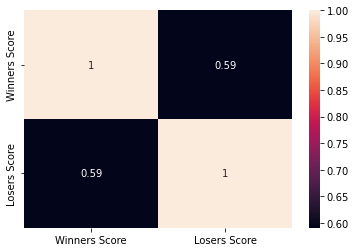

In [135]:
sns.heatmap(df.corr(),annot=True)
plt.show()

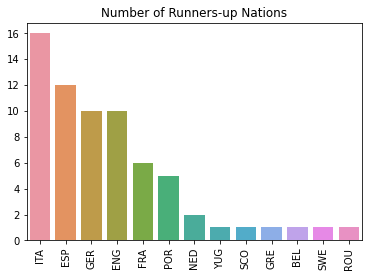

In [136]:
sns.barplot(x=df['Runners-up Nation'].value_counts().index[:20],y=df['Runners-up Nation'].value_counts().values[:20])
plt.xticks(rotation=90)
plt.title('Number of Runners-up Nations')
plt.show()

In [137]:
Winners_Team=df['Winners Team'].value_counts()
names=Winners_Team.index
values=Winners_Team.values

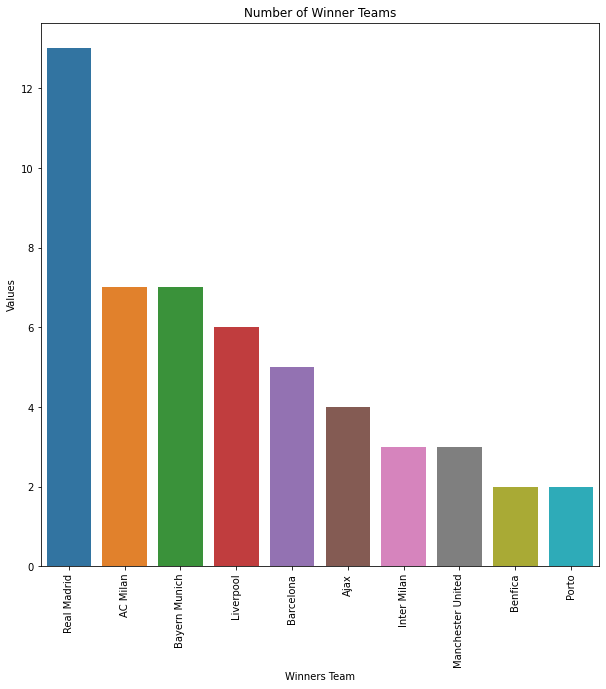

In [138]:
plt.figure(figsize=(10,10))
sns.barplot(x=names[:10],y=values[:10])
plt.xticks(rotation=90)
plt.ylabel('Values')
plt.xlabel('Winners Team')
plt.title('Number of Winner Teams')
plt.show()

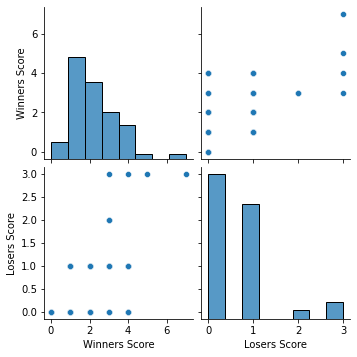

In [139]:
sns.pairplot(df.iloc[:,3:5])
plt.show()

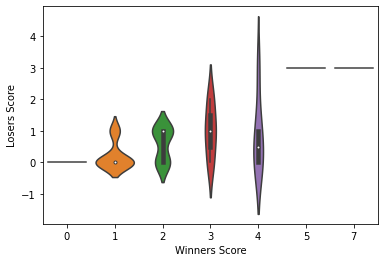

In [140]:
sns.violinplot(x=df['Winners Score'][:50],y=df['Losers Score'][:50])
plt.show()

**Analysis of the Dataset**

In [141]:
df['Total Goals'] = df['Winners Score'] + df['Losers Score']
df.head()

,Season,Winners Nation,Winners Team,Winners Score,Losers Score,Runners-up Nation,Runners-up Team,Attendance,Stadium Name,Stadium City,Country,Total Goals
0,1955–56,ESP,Real Madrid,4,3,FRA,Reims,"38,239",Parc des Princes,Paris,France,7
1,1956–57,ESP,Real Madrid,2,0,ITA,Fiorentina,"124,000",Santiago Bernabéu,Madrid,Spain,2
2,1957–58,ESP,Real Madrid,3,2,ITA,AC Milan,"67,000",Heysel Stadium,Brussels,Belgium,5
3,1958–59,ESP,Real Madrid,2,0,FRA,Reims,"72,000",Neckarstadion,Stuttgart,West Germany,2
4,1959–60,ESP,Real Madrid,7,3,GER,Eintracht Frankfurt,"127,621",Hampden Park,Glasgow,Scotland,10


In [142]:
#Let's create a list that will contain both the winner and loser teams in order to analyse it better 
teams = []
for team in df['Winners Team']:
    teams.append(team)
for team in df['Runners-up Team']:
    teams.append(team)
# create a new dataframe from the list created above
teams = pd.DataFrame(teams)
teams.columns = ['Teams']

In [143]:
def Plot_a_countplot(df, col, title):
    
    plt.figure(figsize=(10,10))
    data = df[col].value_counts().head(15)
    ax = sns.countplot(y=df[col],
                  order=data.index,
                  lw=1,
                  palette='viridis',
                  )
    for x,y in enumerate(data):
        ax.text(1.9,x,y,weight='bold',color='white',fontsize=12,bbox=dict(facecolor='black', alpha=0.7))
    plt.title(title,fontsize=15)

Text(0, 0.5, 'Teams')

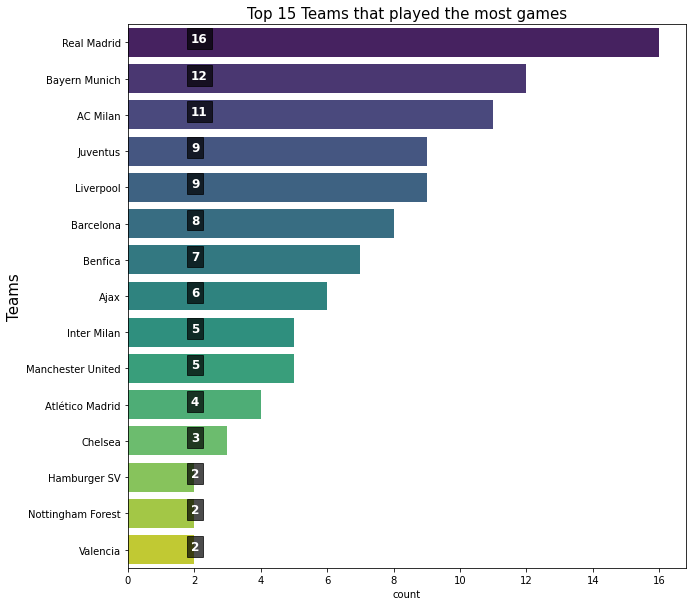

In [144]:
Plot_a_countplot(teams,'Teams', 'Top 15 Teams that played the most games')
plt.ylabel('Teams', fontsize=15)

In [145]:
#plot a bargraph to show each runner-up team and their score
Losers_Team=df['Losers Score'].value_counts()
names=Losers_Team.index
values=Losers_Team.values

Losers_Team=df['Runners-up Team'].value_counts()
names=Losers_Team.index
values=Losers_Team.values

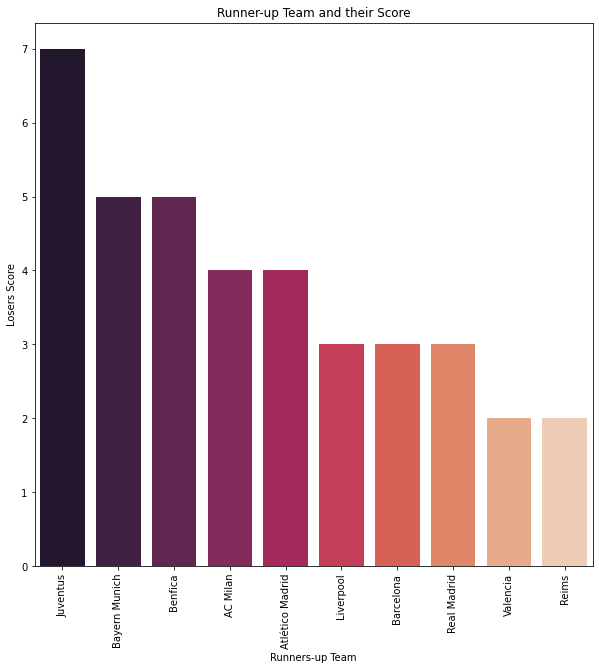

In [146]:
plt.figure(figsize=(10,10))
sns.barplot(x=names[:10],y=values[:10], palette="rocket")
plt.xticks(rotation=90)
plt.ylabel('Losers Score')
plt.xlabel('Runners-up Team')
plt.title('Runner-up Team and their Score')
plt.show()

In [147]:
def Plot_a_countplot(df, col, title):
    
    plt.figure(figsize=(10,10))
    data = df[col].value_counts().head(10)
    ax = sns.countplot(y=df[col],
                  order=data.index,
                  lw=1,
                  palette='crest',
                  )
    for x,y in enumerate(data):
        ax.text(1.9,x,y,weight='bold',color='white',fontsize=12,bbox=dict(facecolor='black', alpha=0.7))
    plt.title(title,fontsize=15)

Text(0, 0.5, 'Seasons')

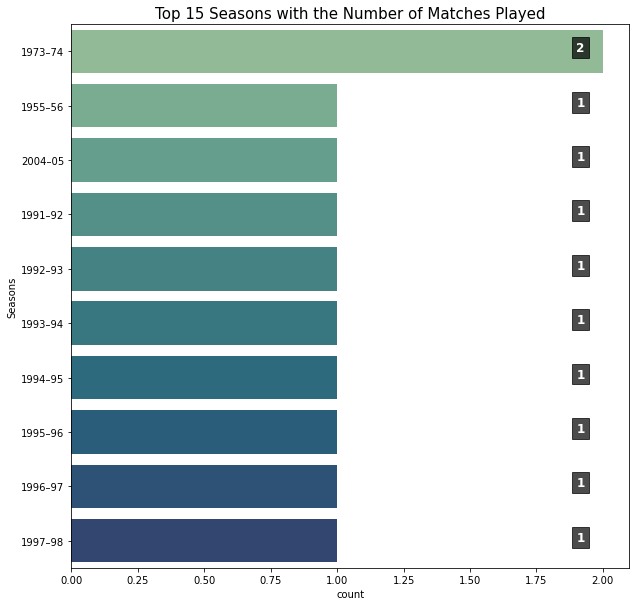

In [148]:
Plot_a_countplot(df, 'Season', 'Top 15 Seasons with the Number of Matches Played')
plt.ylabel('Seasons', fontsize=10)

In [149]:
def Plot_a_countplot(df, col, title):
    
    plt.figure(figsize=(10,10))
    data = df[col].value_counts().head(10)
    ax = sns.countplot(y=df[col],
                  order=data.index,
                  lw=1,
                  palette='cubehelix',
                  )
    for x,y in enumerate(data):
        ax.text(1.9,x,y,weight='bold',color='white',fontsize=12,bbox=dict(facecolor='black', alpha=0.7))
        plt.title(title,fontsize=15)

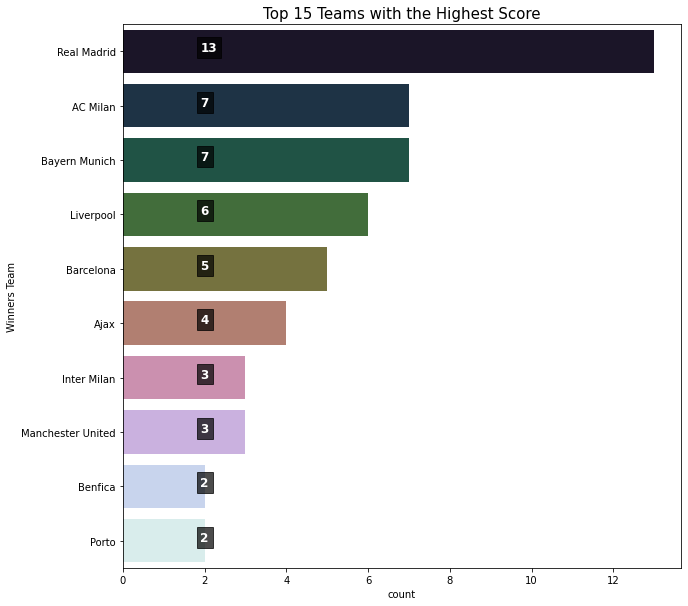

In [150]:
Plot_a_countplot(df, 'Winners Team', 'Top 15 Teams with the Highest Score')

In [151]:
teams['Teams'].value_counts()

Real Madrid                 16
Bayern Munich               12
AC Milan                    11
Juventus                     9
Liverpool                    9
Barcelona                    8
Benfica                      7
Ajax                         6
Inter Milan                  5
Manchester United            5
Atlético Madrid              4
Chelsea                      3
Hamburger SV                 2
Nottingham Forest            2
Valencia                     2
Reims                        2
Borussia Dortmund            2
Marseille                    2
Celtic                       2
Porto                        2
Steaua București             2
Red Star Belgrade            1
Club Brugge                  1
Paris Saint-Germain          1
Tottenham Hotspur            1
Arsenal                      1
Monaco                       1
Bayer Leverkusen             1
Sampdoria                    1
Roma                         1
Malmö FF                     1
Borussia Mönchengladbach     1
PSV Eind

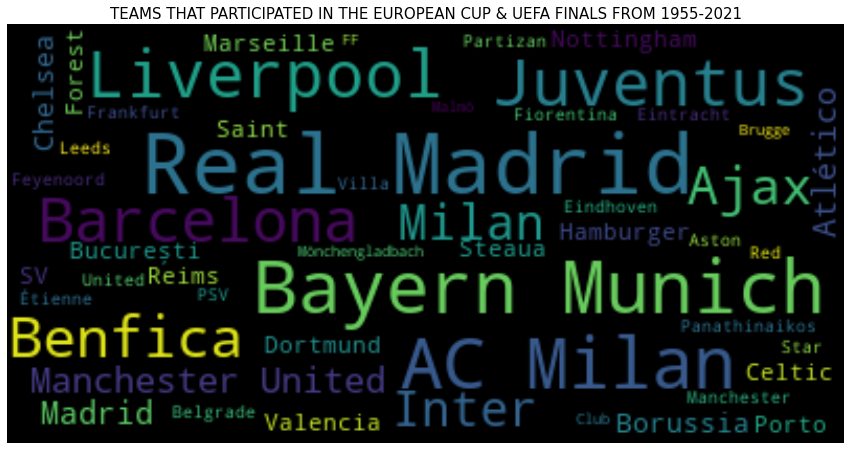

In [152]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in teams['Teams'])


wordcloud = WordCloud(max_words=50,background_color='black',max_font_size=40).generate(text)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('TEAMS THAT PARTICIPATED IN THE EUROPEAN CUP & UEFA FINALS FROM 1955-2021', ha='center',fontsize=15)
plt.show()

In [153]:
#Create a list for nations
nations = []
for nation in df['Winners Nation']:
    nations.append(nation)
for nation in df['Runners-up Nation']:
    nations.append(nation)
    
nations = pd.DataFrame(nations,columns=['Nations'])

In [154]:
nations['Nations'].value_counts()

ESP    30
ITA    28
ENG    24
GER    19
POR     9
NED     8
FRA     7
SCO     2
ROU     2
YUG     2
GRE     1
BEL     1
SWE     1
Name: Nations, dtype: int64

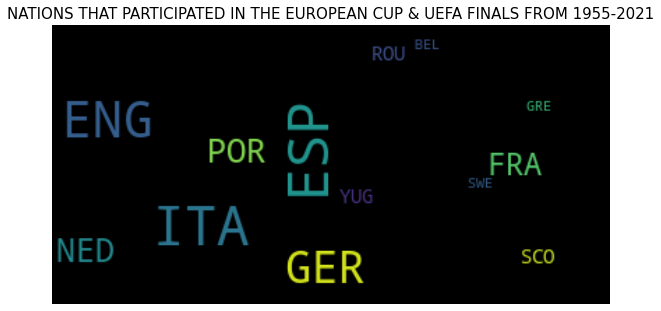

In [155]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in nations['Nations'])


wordcloud = WordCloud(max_words=50,background_color='Black',max_font_size=40).generate(text)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('NATIONS THAT PARTICIPATED IN THE EUROPEAN CUP & UEFA FINALS FROM 1955-2021', ha='center', fontsize=15)
plt.show()

**Ekumatalor Glory**.